<a href="https://colab.research.google.com/github/uday95577/Age/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
tracks_file_path = 'tracks.csv'
artists_file_path = 'artists.csv'

In [ ]:
try:
    # Load both datasets into separate pandas DataFrames.
    tracks_df = pd.read_csv(tracks_file_path, on_bad_lines='skip')
    artists_df = pd.read_csv(artists_file_path)

    print("--- Successfully loaded tracks.csv and artists.csv ---")
    print(f"Tracks DataFrame shape: {tracks_df.shape}")
    print(f"Artists DataFrame shape: {artists_df.shape}\n")

    # --- Data Merging ---
    # Before merging, let's see what columns we can merge on.
    # The 'artists' column in tracks_df looks like it contains artist names,
    # but it's in a list format (e.g., "['Artist Name']"). We need to clean this.

    # Clean the 'artists' column in tracks_df to extract the primary artist name.
    # This removes brackets and quotes.
    tracks_df['artists'] = tracks_df['artists'].str.replace(r"[\[\]']", "", regex=True)

    # The artists_df has a 'name' column. Let's rename it to 'artists' to match for the merge.
    artists_df.rename(columns={'name': 'artists'}, inplace=True)

    # Now, merge the two DataFrames based on the artist's name.
    # We use a 'left' merge to keep all the tracks from the tracks_df.
    # The 'on' parameter specifies the column to join on.
    merged_df = pd.merge(tracks_df, artists_df, on='artists', how='left')

    print("--- Successfully merged the two datasets ---\n")


    # --- Initial Data Inspection on Merged Data ---

    # 1. Print the first 5 rows of the merged DataFrame.
    print("--- First 5 Rows of the Merged Dataset ---")
    print(merged_df.head())
    print("\n" + "="*50 + "\n")

    # 2. Print a concise summary of the merged DataFrame.
    print("--- Merged Dataframe Info (Columns, Data Types, Null Values) ---")
    merged_df.info()
    print("\n" + "="*50 + "\n")

    # 3. Generate descriptive statistics for the numerical columns.
    print("--- Descriptive Statistics for Numerical Columns ---")
    # We'll select only the numeric columns from the merged dataframe for this.
    print(merged_df.describe())


except FileNotFoundError as e:
    print(f"Error: A file was not found.")
    print(e)
    print("Please make sure you have downloaded the dataset and that 'tracks.csv' and 'artists.csv' are in the correct directory.")

--- Successfully loaded tracks.csv and artists.csv ---
Tracks DataFrame shape: (591324, 20)
Artists DataFrame shape: (1162095, 5)

--- Successfully merged the two datasets ---

--- First 5 Rows of the Merged Dataset ---
                     id_x                                 name  popularity_x  \
0  35iwgR4jXetI318WEWsa1Q                                Carve             6   
1  35iwgR4jXetI318WEWsa1Q                                Carve             6   
2  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista             0   
3  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista             0   
4  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado             0   

   duration_ms  explicit          artists                  id_artists  \
0       126903         0              Uli  ['45tIt06XoI0Iio4LBEVpls']   
1       126903         0              Uli  ['45tIt06XoI0Iio4LBEVpls']   
2        98200         0  Fernando Pessoa  ['14jtPCOoNZwquk5wd9DxrY']   
3      

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")

# --- Visualize the Distribution of Key Audio Features ---

print("--- Creating Histograms for Key Audio Features ---")

--- Creating Histograms for Key Audio Features ---


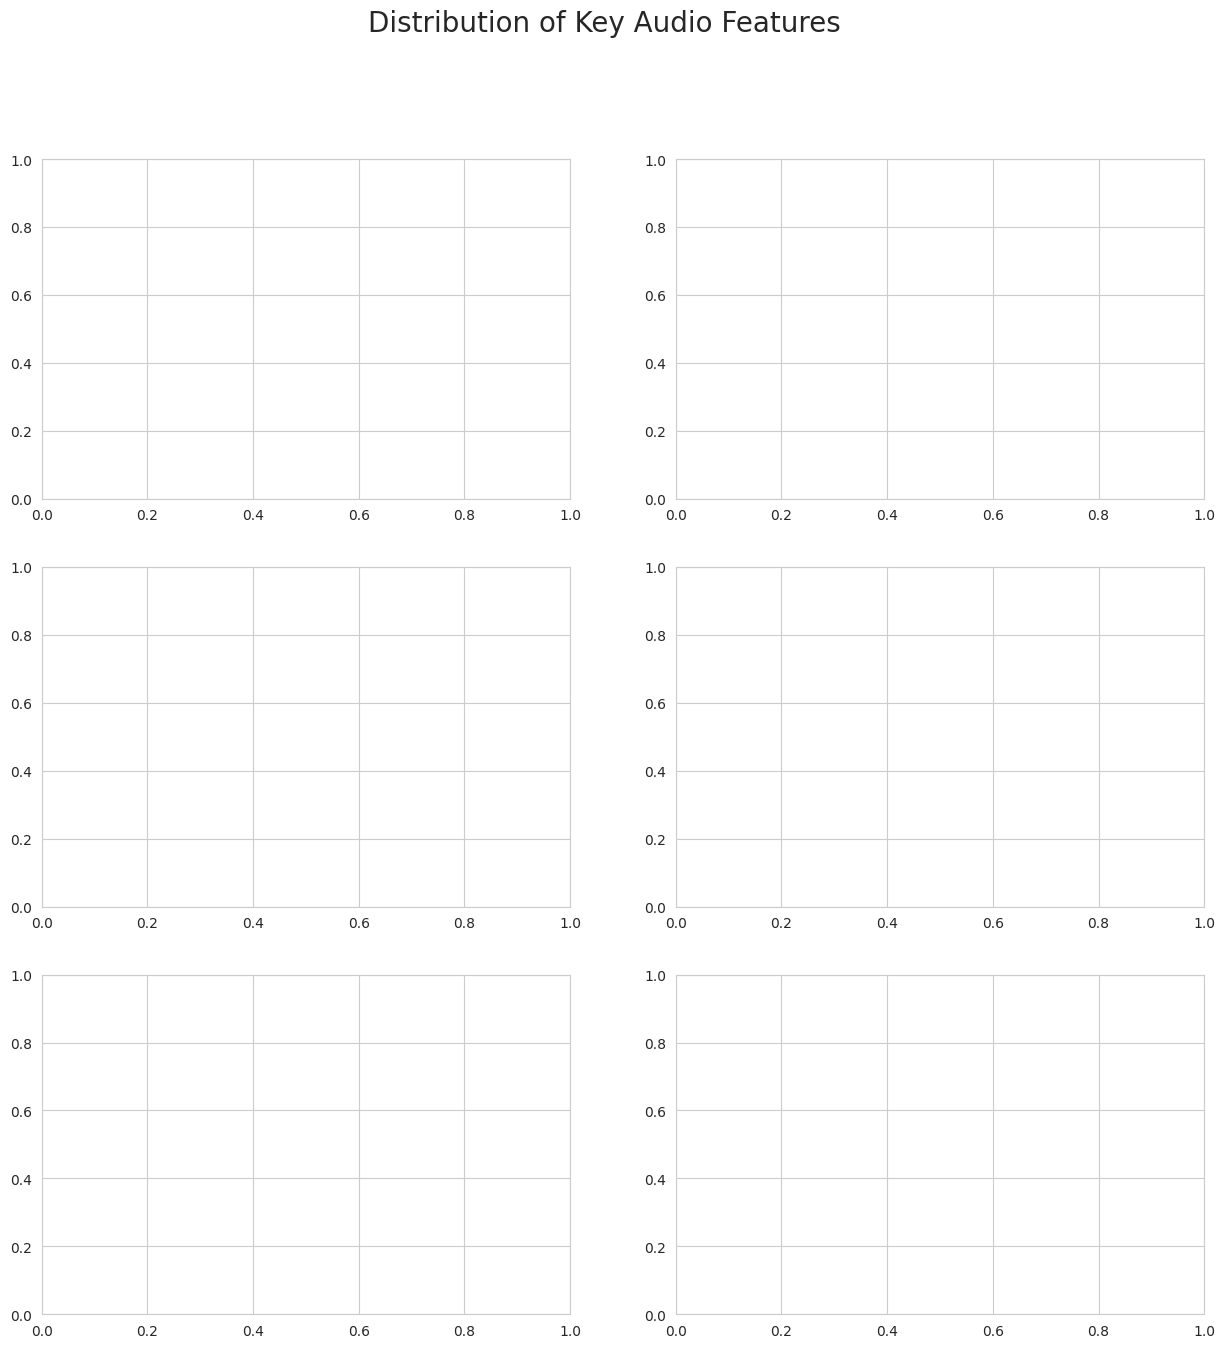

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distribution of Key Audio Features', fontsize=20)

# List of features we want to plot
features_to_plot = ['popularity', 'danceability', 'energy', 'acousticness', 'valence', 'speechiness']
# Flatten the axes array to easily iterate over it
ax = axes.flatten()

In [ ]:
for i, feature in enumerate(features_to_plot):
    # Use 'popularity_x' for the track popularity which is in the merged_df
    if feature == 'popularity':
        sns.histplot(merged_df['popularity_x'], ax=ax[i], kde=True, color='skyblue')
        ax[i].set_title(f'Distribution of Track Popularity', fontsize=14)
        ax[i].set_xlabel('Track Popularity')
    else:
        sns.histplot(merged_df[feature], ax=ax[i], kde=True, color='skyblue')
        ax[i].set_title(f'Distribution of {feature.capitalize()}', fontsize=14)
        ax[i].set_xlabel(feature.capitalize())
    ax[i].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

<Figure size 640x480 with 0 Axes>


--- Creating Histogram for Release Year ---


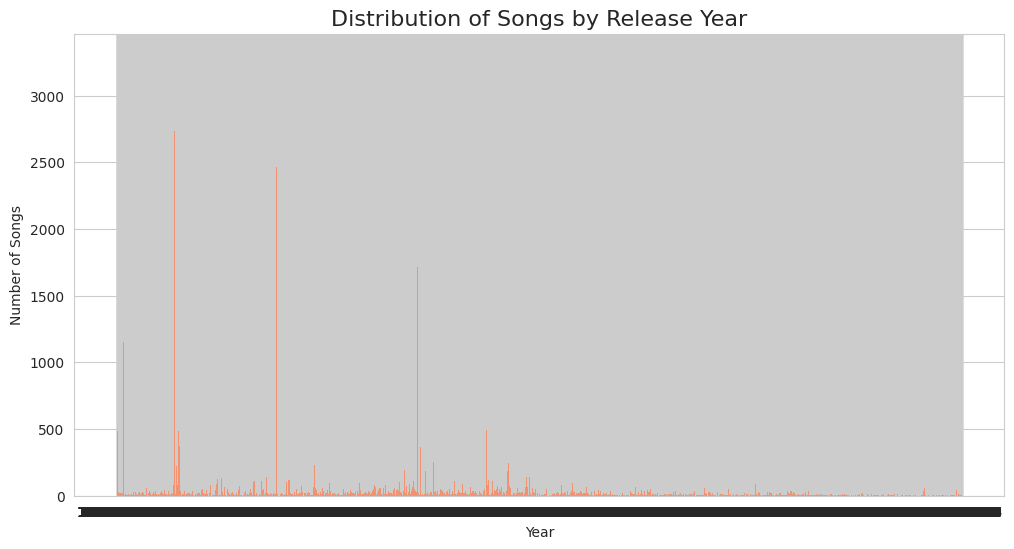

In [ ]:
print("\n--- Creating Histogram for Release Year ---")

plt.figure(figsize=(12, 6))
sns.histplot(merged_df['release_date'], bins=50, kde=False, color='coral')
plt.title('Distribution of Songs by Release Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
print("--- Calculating Correlation Matrix ---")

# Select only the numerical columns for the correlation matrix.
# We'll include our key audio features and the track popularity ('popularity_x').
numerical_cols = ['popularity_x', 'danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


--- Calculating Correlation Matrix ---


In [ ]:
corr_df = merged_df[numerical_cols]

# Calculate the correlation matrix. The .corr() method computes the pairwise correlation of columns.
correlation_matrix = corr_df.corr()

# --- Visualize the Correlation Matrix as a Heatmap ---
print("--- Generating Heatmap ---")

--- Generating Heatmap ---


In [ ]:
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

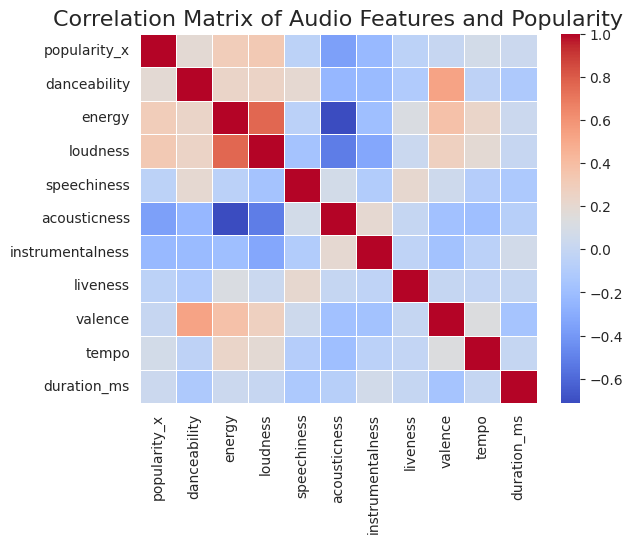


--- Correlation with Track Popularity (popularity_x) ---
popularity_x        1.000000
loudness            0.326944
energy              0.298296
danceability        0.188697
tempo               0.069698
duration_ms         0.029220
valence             0.003689
speechiness        -0.048308
liveness           -0.050676
instrumentalness   -0.231061
acousticness       -0.365159
Name: popularity_x, dtype: float64


In [ ]:
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)

# Add a title to the plot
plt.title('Correlation Matrix of Audio Features and Popularity', fontsize=16)

# Display the plot
plt.show()

# To make it easier to see the correlations with popularity, let's print them out directly.
print("\n--- Correlation with Track Popularity (popularity_x) ---")
# We sort the values to see the strongest relationships first.
popularity_correlations = correlation_matrix['popularity_x'].sort_values(ascending=False)
print(popularity_correlations)


In [ ]:
print("--- Preparing Data for Time Series Analysis ---")

# The 'release_date' column might contain full dates (e.g., '1999-10-22') or just the year.
# We need to extract just the year for our analysis.
# We'll convert the column to datetime objects, handling errors by coercing invalid parsing to NaT (Not a Time).
# Then we extract the year.
merged_df['year'] = pd.to_datetime(merged_df['release_date'], errors='coerce').dt.year

# Now, we group the data by year and calculate the average for key audio features.
# This gives us a yearly summary of the 'average' song.
yearly_features = merged_df.groupby('year')[['acousticness', 'danceability', 'energy', 'valence']].mean().reset_index()

print("--- Yearly Average of Audio Features ---")
print(yearly_features.head())

--- Preparing Data for Time Series Analysis ---
--- Yearly Average of Audio Features ---
     year  acousticness  danceability    energy   valence
0  1900.0      0.139000      0.659000  0.791000  0.956000
1  1922.0      0.785706      0.589268  0.222407  0.533459
2  1923.0      0.791930      0.662303  0.238749  0.688931
3  1924.0      0.974726      0.511795  0.318524  0.620766
4  1925.0      0.892861      0.618357  0.178930  0.545681



--- Plotting Audio Feature Trends Over Time ---


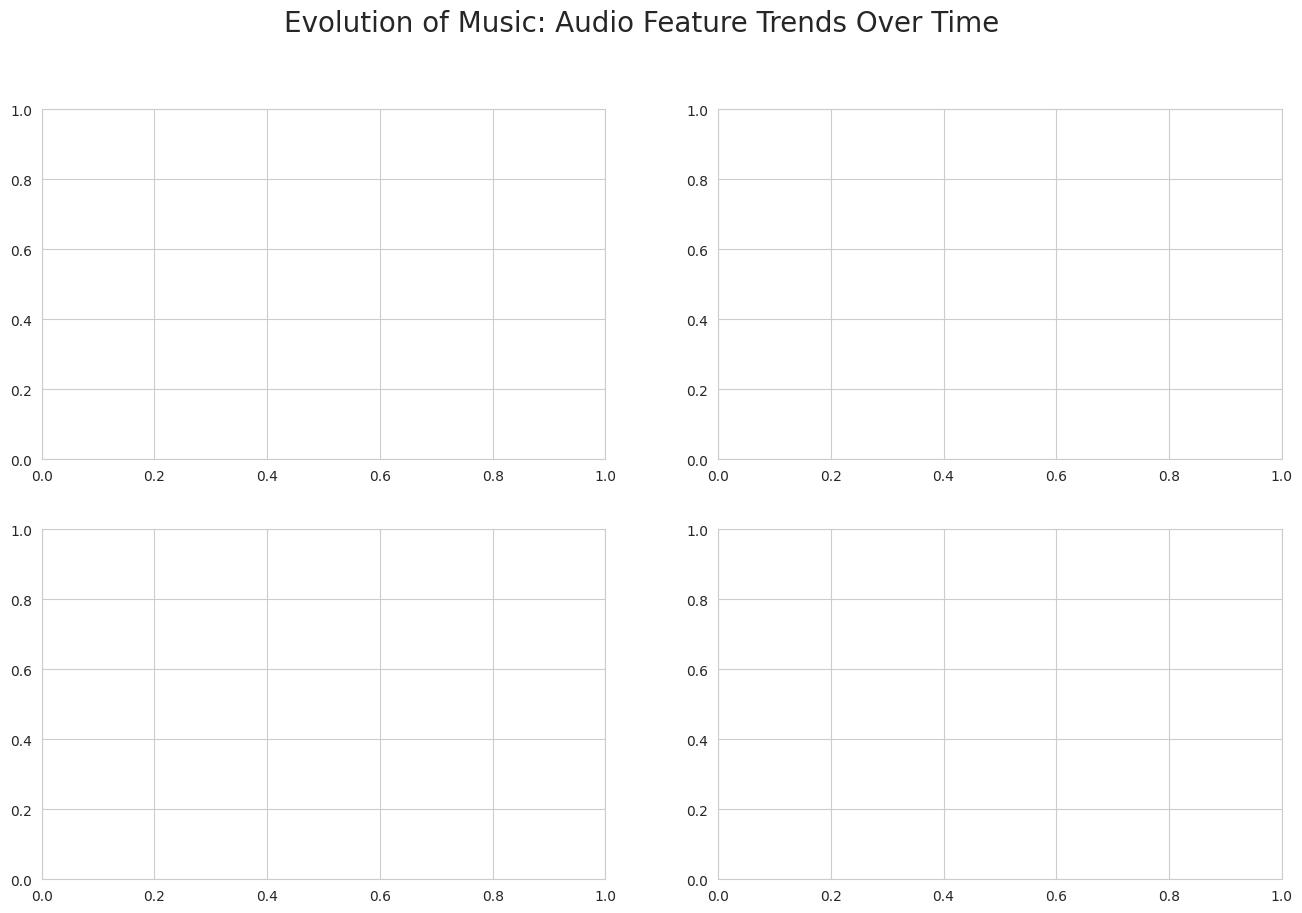

In [ ]:
print("\n--- Plotting Audio Feature Trends Over Time ---")

# We will create a figure that holds multiple plots to see the trends together.
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Evolution of Music: Audio Feature Trends Over Time', fontsize=20)

# List of features we want to plot
time_features_to_plot = ['acousticness', 'danceability', 'energy', 'valence']
ax = axes.flatten()

In [ ]:
for i, feature in enumerate(time_features_to_plot):
    sns.lineplot(x='year', y=feature, data=yearly_features, ax=ax[i], color='purple')
    ax[i].set_title(f'Trend of {feature.capitalize()}', fontsize=14)
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel(f'Average {feature.capitalize()}')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.show()

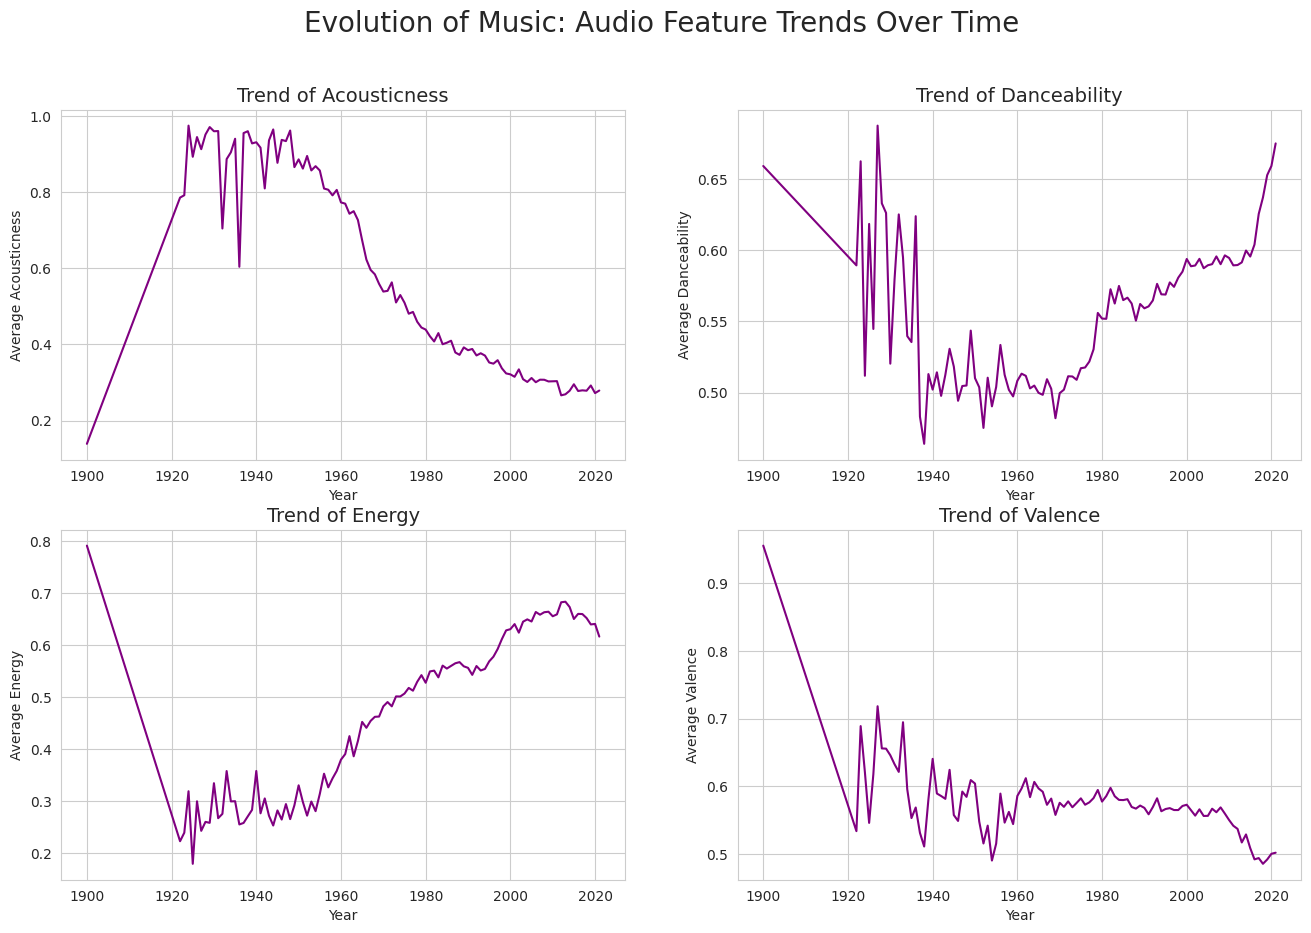

In [ ]:
fig

In [ ]:
print("--- Preparing Data for Time Series Analysis ---")

# The 'release_date' column might contain full dates (e.g., '1999-10-22') or just the year.
# We need to extract just the year for our analysis.
# We'll convert the column to datetime objects, handling errors by coercing invalid parsing to NaT (Not a Time).
# Then we extract the year.
merged_df['year'] = pd.to_datetime(merged_df['release_date'], errors='coerce').dt.year

# Now, we group the data by year and calculate the average for key audio features.
# This gives us a yearly summary of the 'average' song.
yearly_features = merged_df.groupby('year')[['acousticness', 'danceability', 'energy', 'valence']].mean().reset_index()

--- Preparing Data for Time Series Analysis ---


--- Yearly Average of Audio Features ---
     year  acousticness  danceability    energy   valence
0  1900.0      0.139000      0.659000  0.791000  0.956000
1  1922.0      0.785706      0.589268  0.222407  0.533459
2  1923.0      0.791930      0.662303  0.238749  0.688931
3  1924.0      0.974726      0.511795  0.318524  0.620766
4  1925.0      0.892861      0.618357  0.178930  0.545681

--- Plotting Audio Feature Trends Over Time ---


Text(0.5, 0.98, 'Evolution of Music: Audio Feature Trends Over Time')

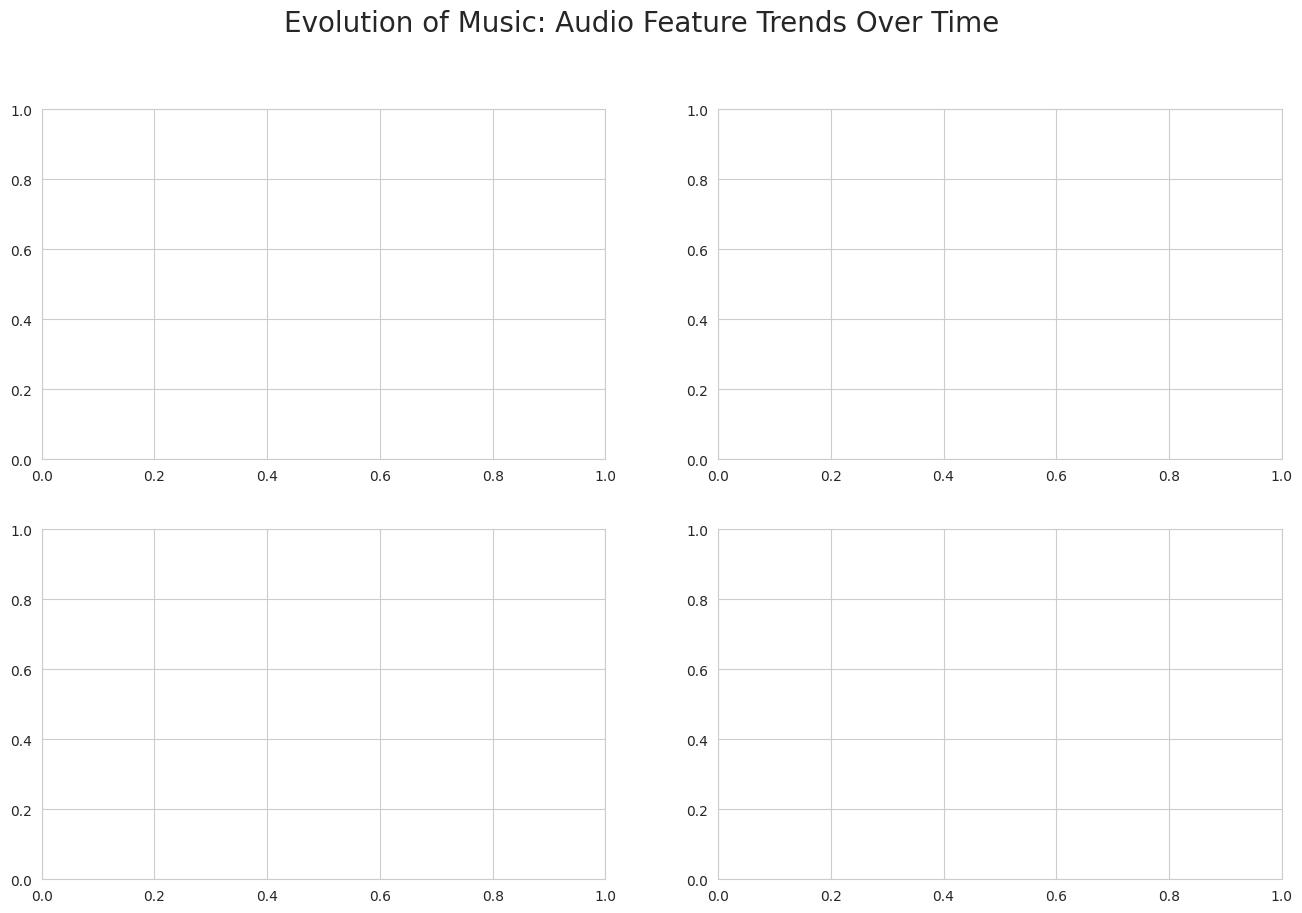

In [ ]:
print("--- Yearly Average of Audio Features ---")
print(yearly_features.head())


# --- Visualize the Trends ---
print("\n--- Plotting Audio Feature Trends Over Time ---")

# We will create a figure that holds multiple plots to see the trends together.
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Evolution of Music: Audio Feature Trends Over Time', fontsize=20)


<Figure size 640x480 with 0 Axes>

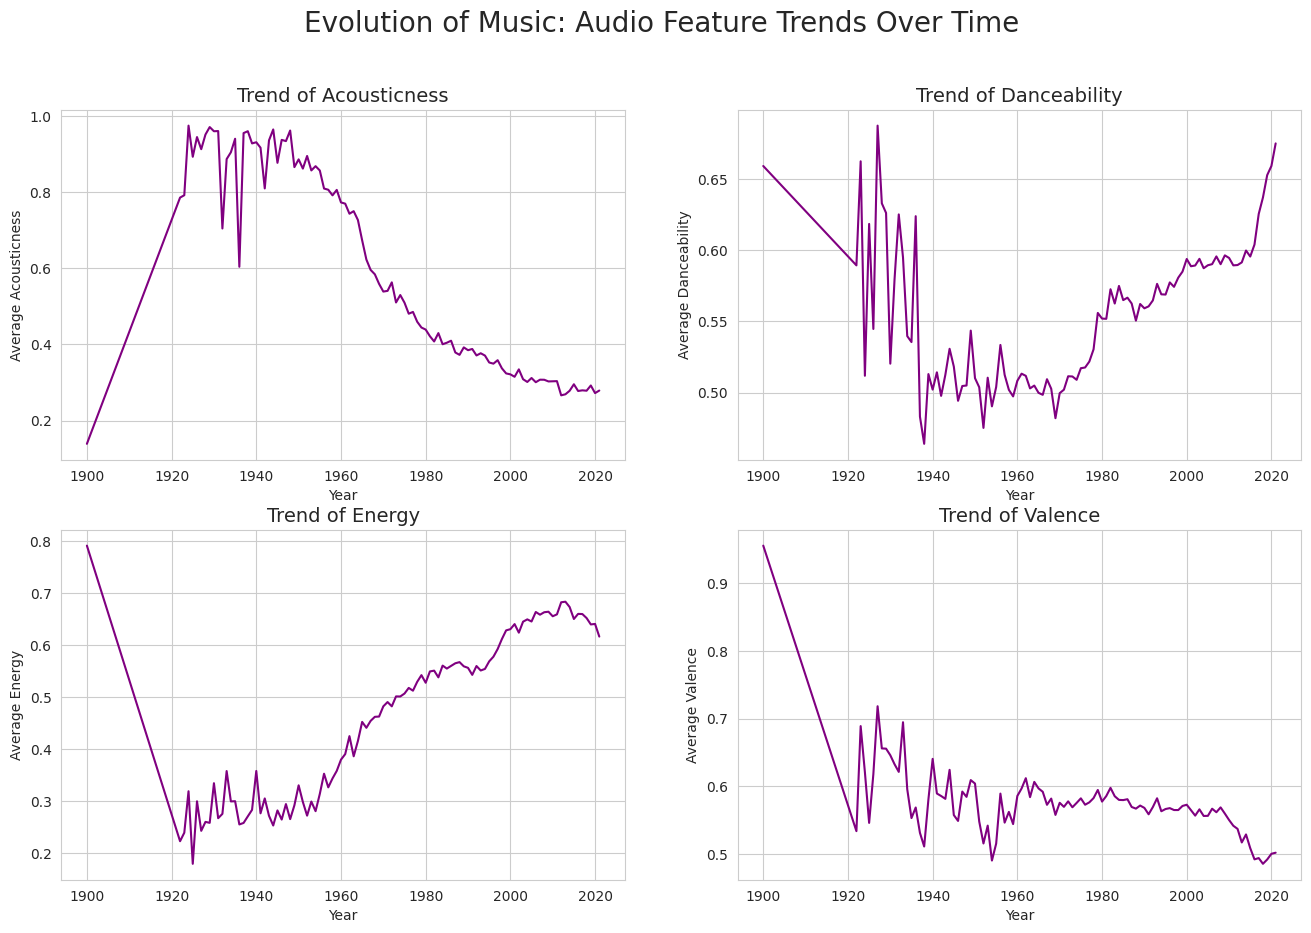

In [ ]:
time_features_to_plot = ['acousticness', 'danceability', 'energy', 'valence']
ax = axes.flatten()

# Loop through each feature and create a line plot for it
for i, feature in enumerate(time_features_to_plot):
    sns.lineplot(x='year', y=feature, data=yearly_features, ax=ax[i], color='purple')
    ax[i].set_title(f'Trend of {feature.capitalize()}', fontsize=14)
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel(f'Average {feature.capitalize()}')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

# Add the figure object as the last line to ensure it displays in notebooks
fig


In [ ]:
print("--- Preparing Data for Genre Analysis ---")

# The 'genres' column is a string representation of a list (e.g., "['pop', 'dance pop']").
# We'll extract the primary genre for each artist.

# First, drop rows where genre information is missing to avoid errors.
merged_df.dropna(subset=['genres'], inplace=True)


--- Preparing Data for Genre Analysis ---


In [ ]:
def get_primary_genre(genre_str):
    # This handles the string format "['genre1', 'genre2']"
    try:
        # Remove brackets and single quotes, then split by comma to get the first element.
        return genre_str.replace("[", "").replace("]", "").replace("'", "").split(",")[0].strip()
    except (IndexError, AttributeError):
        # Return None if the format is unexpected or the string is empty
        return None


In [ ]:
merged_df['primary_genre'] = merged_df['genres'].apply(get_primary_genre)

# Now, let's find the top 5 most common genres to keep the chart readable.
top_5_genres = merged_df['primary_genre'].value_counts().nlargest(5).index

print(f"\n--- Top 5 Genres Found ---\n{top_5_genres.tolist()}\n")



--- Top 5 Genres Found ---
['', 'adult standards', 'album rock', 'hoerspiel', 'c-pop']



In [ ]:
top_genres_df = merged_df[merged_df['primary_genre'].isin(top_5_genres)]

# Calculate the average audio features for each of these genres.
features_for_radar = ['danceability', 'energy', 'valence', 'acousticness', 'speechiness']
genre_characteristics = top_genres_df.groupby('primary_genre')[features_for_radar].mean()


# --- Create the Radar Chart ---
print("--- Generating Radar Chart for Top Genres ---")


--- Generating Radar Chart for Top Genres ---


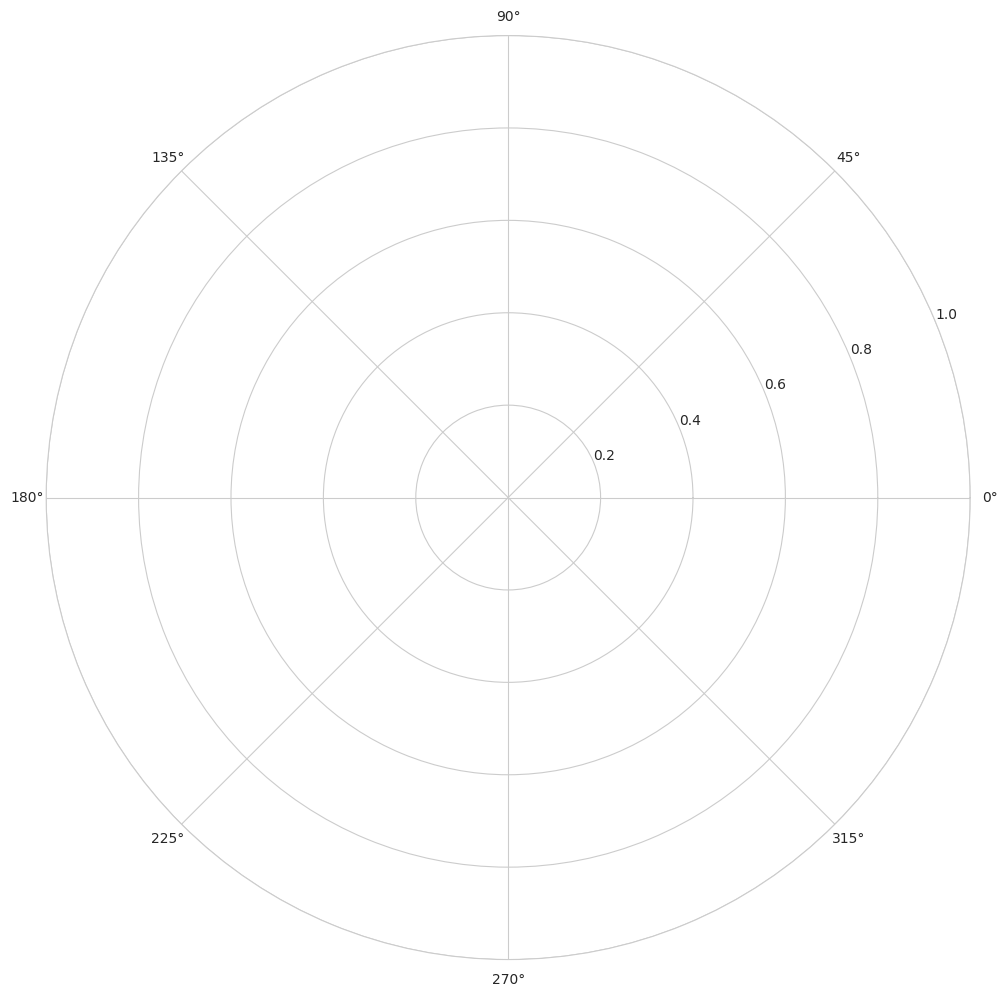

In [ ]:
labels = np.array(genre_characteristics.columns)
num_vars = len(labels)

# Compute angle for each axis of the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Repeat the first angle to close the circle

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))


/tmp/ipython-input-853451936.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', 5)
/tmp/ipython-input-853451936.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


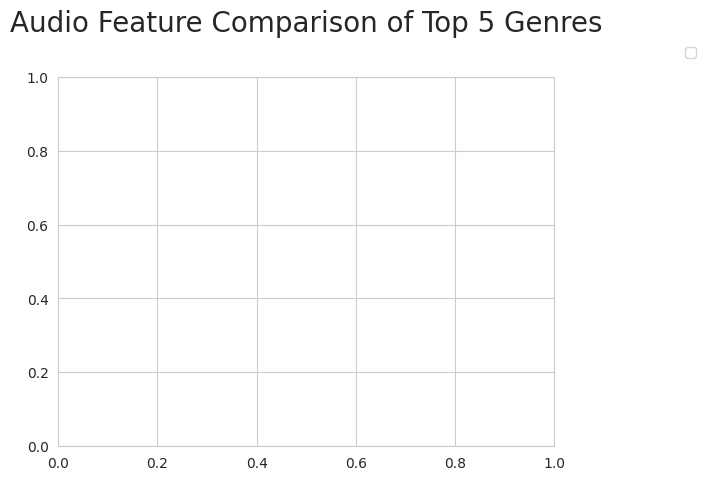

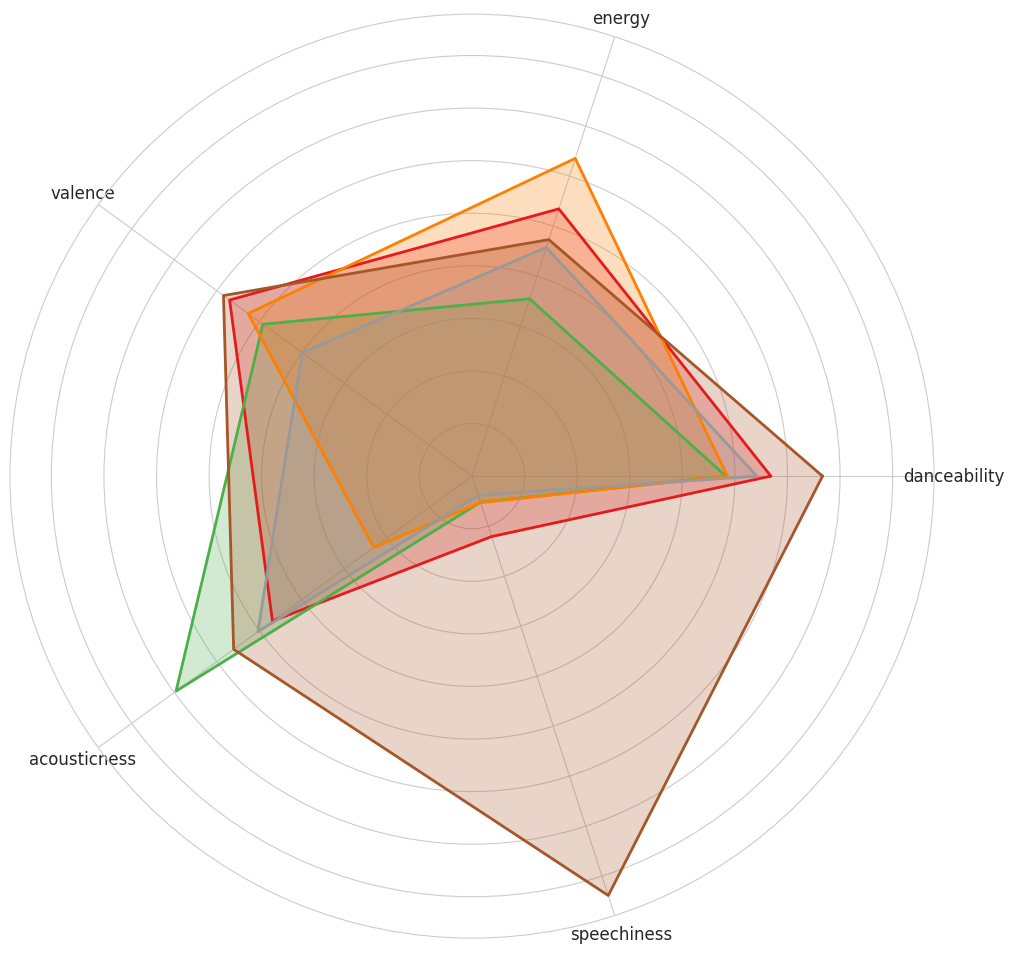

In [ ]:
def add_to_radar(genre, color):
    values = genre_characteristics.loc[genre].values.flatten().tolist()
    values += values[:1] # Repeat the first value to close the circle
    ax.plot(angles, values, color=color, linewidth=2, label=genre)
    ax.fill(angles, values, color=color, alpha=0.25)

# Add each of the top 5 genres to the radar chart with a unique color
colors = plt.cm.get_cmap('Set1', 5)
for i, genre in enumerate(top_5_genres):
    add_to_radar(genre, colors(i))

# Configure the plot aesthetics
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=12)
plt.title('Audio Feature Comparison of Top 5 Genres', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

# Add the figure object as the last line to ensure it displays in notebooks
fig


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("--- Preparing Data for Machine Learning ---")

# 1. Define our features (X) and target (y)
# We'll use the numerical features we analyzed earlier.
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
target = 'popularity_x'

# Create the X and y DataFrames. We'll drop any rows with missing values to be safe.
model_df = merged_df[features + [target]].dropna()

X = model_df[features]
y = model_df[target]

--- Preparing Data for Machine Learning ---


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} songs")
print(f"Testing set size: {X_test.shape[0]} songs\n")


# 3. Train a Machine Learning Model
print("--- Training the RandomForestRegressor Model ---")
# RandomForest is a powerful and popular model for regression tasks like this.
# n_estimators is the number of trees in the forest.
# n_jobs=-1 uses all available CPU cores to speed up training.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)


Training set size: 428053 songs
Testing set size: 107014 songs

--- Training the RandomForestRegressor Model ---


In [ ]:
model.fit(X_train, y_train)
print("Model training complete.\n")


# 4. Evaluate the Model
print("--- Evaluating Model Performance ---")
# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
# This tells us, on average, how far off our predictions are from the actual popularity score.
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error on the Test Set: {mae:.2f}")
print("This means our model's predictions are, on average, this many points away from the true popularity score (0-100 scale).\n")


Model training complete.

--- Evaluating Model Performance ---
Mean Absolute Error on the Test Set: 11.66
This means our model's predictions are, on average, this many points away from the true popularity score (0-100 scale).



--- Feature Importances ---


/tmp/ipython-input-988929644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


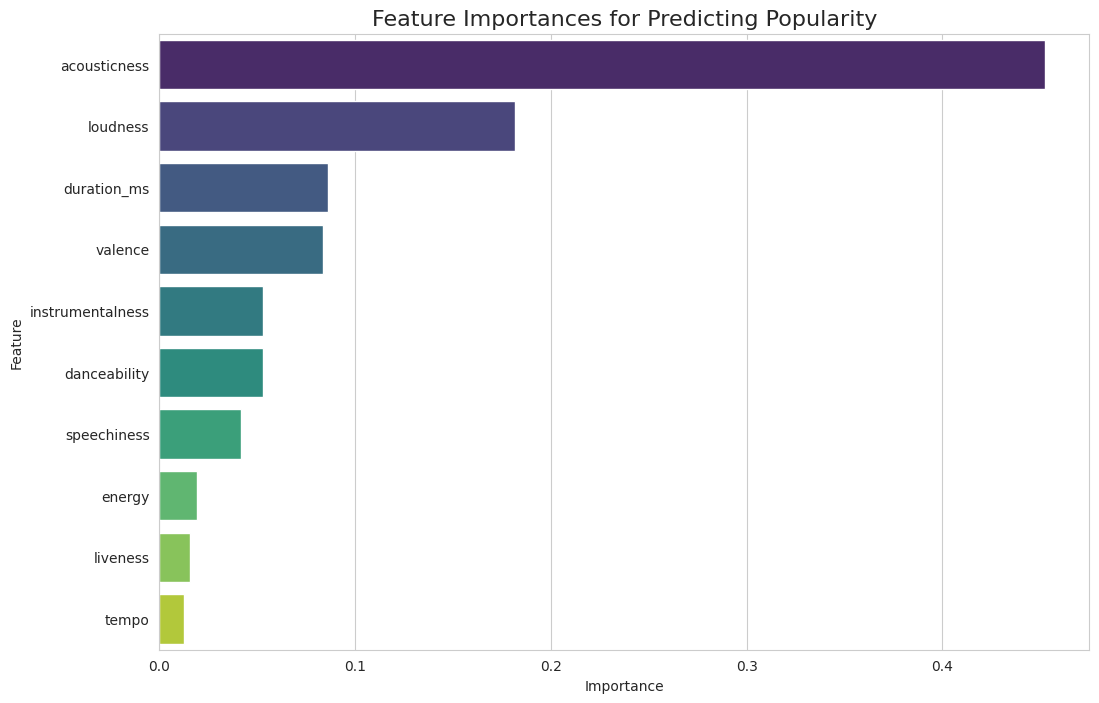

In [ ]:
print("--- Feature Importances ---")
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances for Predicting Popularity', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()